In [4]:
from konlpy.tag import Mecab

# Mecab 초기화
mecab = Mecab(dicpath='/usr/local/lib/mecab/dic/mecab-ko-dic')

# 테스트 텍스트
text = 'SUPEX를 통한 AI리더십과 DDR5 메모리 기술'

# 형태소 분석
result = mecab.morphs(text)
print("형태소 분석 결과:", result)

# 품사 태그와 함께 출력
pos_result = mecab.pos(text)
print("\n품사 태그 분석 결과:", pos_result)

형태소 분석 결과: ['SUPEX', '를', '통한', 'AI', '리더십', '과', 'DDR', '5', '메모리', '기술']

품사 태그 분석 결과: [('SUPEX', 'SL'), ('를', 'JKO'), ('통한', 'VV+ETM'), ('AI', 'SL'), ('리더십', 'NNG'), ('과', 'JC'), ('DDR', 'SL'), ('5', 'SN'), ('메모리', 'NNG'), ('기술', 'NNG')]


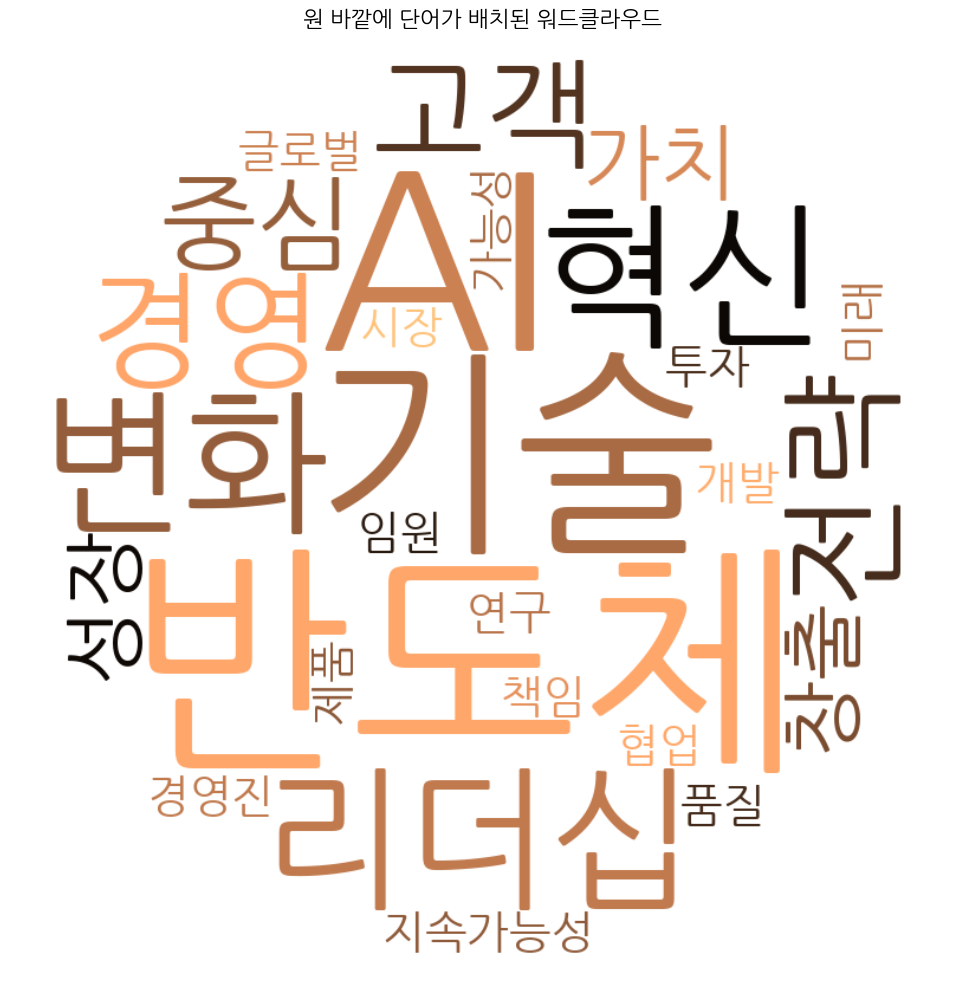

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1. 사용할 텍스트 예제
text = """
AI 반도체 기술 리더십 변화 혁신 경영 전략 고객 중심 가치 창출 성장 지속가능성 
연구 개발 협업 미래 가능성 제품 품질 투자 책임 경영진 임원 글로벌 시장
"""

# 2. 반전된 원 마스크 생성 함수 (원 내부는 비우고 바깥에 단어 배치)
def create_inverse_circle_mask(size=800):
    x, y = np.ogrid[:size, :size]
    center = size // 2
    radius = size // 2 - 10
    circle_mask = (x - center)**2 + (y - center)**2 <= radius**2
    inverse_mask = np.where(circle_mask, 0, 255).astype(np.uint8)  # 🔁 반전
    return inverse_mask

# 3. 마스크 생성
mask = create_inverse_circle_mask(800)

# 4. 워드클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    width=800,
    height=800,
    background_color='white',
    mask=mask,
    colormap='copper',
    prefer_horizontal=0.8,
    contour_width=0
).generate(text)

# 5. 시각화
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("원 바깥에 단어가 배치된 워드클라우드", fontsize=16)
plt.tight_layout()
plt.show()
